In [126]:
import matplotlib.pyplot as plt

import healpy as hp
import numpy as np
import astropy as ap

%matplotlib inline

In [28]:

def calc_season(ra, time):
    """Calculate the 'season' in the survey for a series of ra/time values of an observation.
    Based only on the RA of the point on the sky, it calculates the 'season' based on when the sun
    passes through this RA (this marks the start of a 'season').

    Note that seasons should be calculated using the RA of a fixed point on the sky, such as
    the slice_point['ra'] if calculating season values for a series of opsim pointings on the sky.
    To convert to integer seasons, use np.floor(seasons)

    Parameters
    ----------
    ra : `float`
        The RA (in degrees) of the point on the sky
    time : `np.ndarray`
        The times of the observations, in MJD days

    Returns
    -------
    seasons : `np.array`
        The season values, as floats.
    """
    # A reference time and sun RA location to anchor the location of the Sun
    # This time was chosen as it is close to the expected start of the survey.
    ref_time = 60575.0
    ref_sun_ra = 179.20796047239727
    # Calculate the fraction of the sphere/"year" for this location
    offset = (ra - ref_sun_ra) / 360 * 365.25
    # Calculate when the seasons should begin
    season_began = ref_time + offset
    # Calculate the season value for each point.
    seasons = (time - season_began) / 365.25
    # (usually) Set first season at this point to 0
    # seasons = seasons - np.floor(np.min(seasons))
    return seasons
    # The reference values can be evaluated using:
    # from astropy.time import Time
    # from astropy.coordinates import get_sun
    # from astropy.coordinates import EarthLocation
    # loc = EarthLocation.of_site('Cerro Pachon')
    # t = Time('2024-09-22T00:00:00.00', format='isot', scale='utc', location=loc)
    # print('Ref time', t.utc.mjd)
    # print('Ref sun RA', get_sun(t).ra.deg, t.utc.mjd)
    # print('local sidereal time at season start', t.sidereal_time('apparent').deg)

In [5]:
ra, dec = hp.pix2ang(128, np.arange(hp.nside2npix(128), dtype=int), nest=True, lonlat=True)

In [76]:
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation

In [8]:
loc = EarthLocation.of_site('Cerro Pachon')


In [120]:
import subprocess
subprocess.run("rm roll*.png", shell=True)

sec_per_month = 360.25*24*60*60/12

tu = Time('2025-09-01T00:00:00.00', format='isot', scale='utc', location=loc)
td = Time('2024-09-01T00:00:00.00', format='isot', scale='utc', location=loc)
dt = (tu-td)/12

ts = Time('2024-09-01T00:00:00.00', format='isot', scale='utc', location=loc)
for i in range(96):
    season = np.floor(calc_season(ra, ts.utc.mjd)/0.5)*0.5 + 1
    hp.orthview(season, nest=True, min=0, max=10, title=ts.to_string())
    hp.graticule()
    plt.savefig("roll%02d.png" % i)
    plt.close("all")
    ts += dt
    

In [121]:
import imageio

import glob

filenames = sorted(glob.glob("roll*.png"))


import imageio
with imageio.get_writer('roll.gif', mode='I', duration=500) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

/var/folders/p6/5q6thssj6sx3drv_mrndv1v40000gn/T/ipykernel_44843/3280145318.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [73]:
TimeDelta?

In [80]:
t.to_string()

/Users/beckermr/mambaforge/envs/work/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


'2027-05-19T00:00:00.000'

In [91]:
hp.mollview?

In [92]:
plt.close("all")

In [99]:
imageio.help("gif")

GIF-PIL - Compuserve GIF via Pillow

    See :mod:`imageio.plugins.pillow_legacy`



In [101]:
print(imageio.plugins.pillow_legacy.GENERIC_DOCS)


    Parameters for reading
    ----------------------

    pilmode : str
        From the Pillow documentation:

        * 'L' (8-bit pixels, grayscale)
        * 'P' (8-bit pixels, mapped to any other mode using a color palette)
        * 'RGB' (3x8-bit pixels, true color)
        * 'RGBA' (4x8-bit pixels, true color with transparency mask)
        * 'CMYK' (4x8-bit pixels, color separation)
        * 'YCbCr' (3x8-bit pixels, color video format)
        * 'I' (32-bit signed integer pixels)
        * 'F' (32-bit floating point pixels)

        PIL also provides limited support for a few special modes, including
        'LA' ('L' with alpha), 'RGBX' (true color with padding) and 'RGBa'
        (true color with premultiplied alpha).

        When translating a color image to grayscale (mode 'L', 'I' or 'F'),
        the library uses the ITU-R 601-2 luma transform::

            L = R * 299/1000 + G * 587/1000 + B * 114/1000
    as_gray : bool
        If True, the image is converted usin

In [124]:
hp.gnomview?

In [127]:
from healpy.newvisufunc import projview

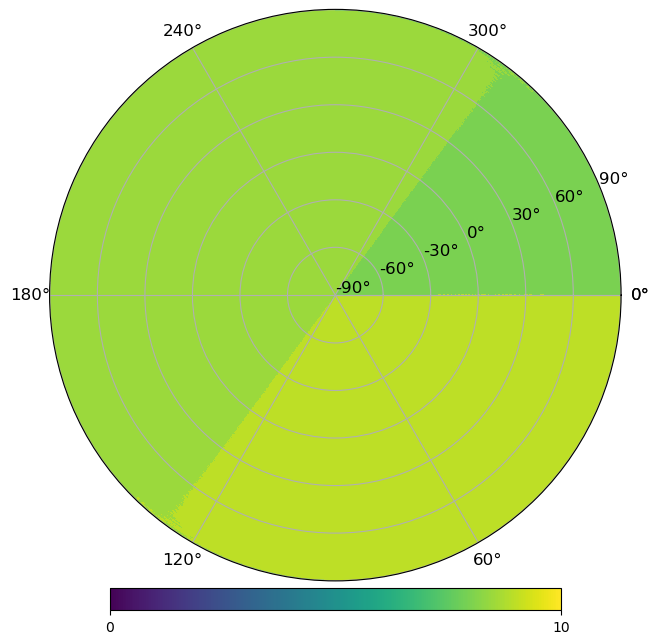

In [135]:
projview(season, nest=True, min=0, max=10, projection_type="polar", graticule=True, graticule_labels=True)